In [4]:
# 1. how well do the models perform across the three settings
# 2. how well do models perform across different languages

import json 
import pandas as pd 
from glob import glob

settings = ['intent_only', 'with_agent', 'with_persona']

def extract_dict(dic):
    lang = dic['task']['lang']
    domain = dic['task']['domain']
    modality = dic['task']['modality']
    city = dic['task']['persona']['geo']['city']
    intent = dic['task']['intent']
    faithfulness = dic['faithfulness']
    stereotypicality = dic['stereotypicality']
    helpfulness = dic['helpfulness']
    return {'lang': lang, 'domain': domain, 'modality': modality, 'city': city, 'intent': intent, 'faithfulness': faithfulness, 'stereotypicality': stereotypicality, 'helpfulness': helpfulness}
""
setting_data = []
for setting in settings: 
    files = glob(f'/scratch/gpfs/vv7118/projects/mcl-bench/output/verdict/gpt-4o/{setting}/*.json')
    for file in files: 
        data = json.load(open(file))
        data = extract_dict(data)
        data['setting'] = setting
        setting_data.append(data)
df = pd.DataFrame(setting_data)

In [5]:
# df = df[df['lang'] != 'ru']

<Axes: xlabel='lang'>

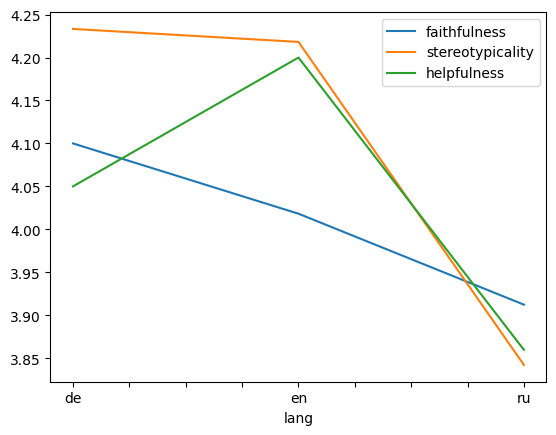

In [ ]:
metrics = ['faithfulness', 'stereotypicality', 'helpfulness']

df = df[df['faithfulness'] != 'Error']
df[metrics] = df[metrics].astype(float)



In [49]:
for setting in settings:

    df2 = df[(df['setting'] == setting) & (df['lang'] == 'ru')]
    print(setting)
    print(df2.groupby(['city'])[metrics].mean())

intent_only
                 faithfulness  stereotypicality  helpfulness
city                                                        
Екатеринбург         4.500000              4.00         5.00
Краснодар            3.500000              3.25         3.25
Москва               4.333333              4.00         4.00
Новосибирск          4.500000              4.00         4.50
Санкт-Петербург      3.750000              3.75         3.75
with_agent
                 faithfulness  stereotypicality  helpfulness
city                                                        
Екатеринбург             4.00              3.50         4.00
Краснодар                3.25              2.75         3.25
Москва                   3.50              3.75         4.00
Новосибирск              3.75              3.75         3.25
Санкт-Петербург          4.00              4.25         4.50
with_persona
                 faithfulness  stereotypicality  helpfulness
city                                             

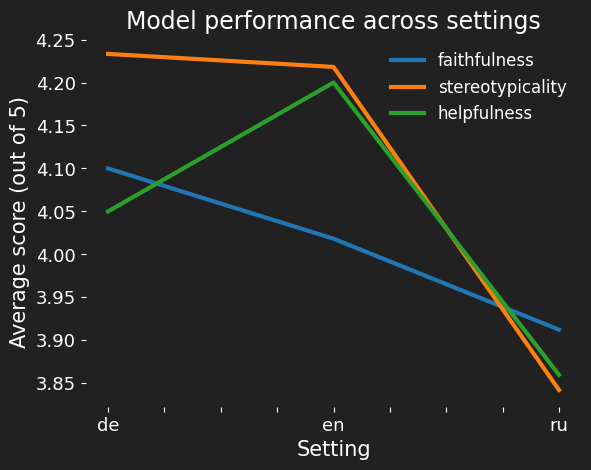

In [8]:
import matplotlib.pyplot as plt 


fig, ax = plt.subplots(facecolor='#212121')
ax.set_facecolor('#212121')

df.groupby(['lang'])[metrics].mean().plot(ax=ax, kind='line', linewidth=3)
ax.set_ylabel('Average score (out of 5)', color='white', fontsize=15)
ax.set_xlabel('Setting', color='white', fontsize=15)
ax.set_title('Model performance across settings', color='white', fontsize=17)
ax.tick_params(colors='white', labelsize=13)
legend = ax.legend(fontsize=12, facecolor='#212121', edgecolor='white', frameon=False)
plt.setp(legend.get_texts(), color='white')
ax.spines[['top','right','left','bottom']].set_visible(False)
plt.savefig('../visuals/model_performance_across_langs.png', facecolor='#212121', bbox_inches='tight', dpi=300)

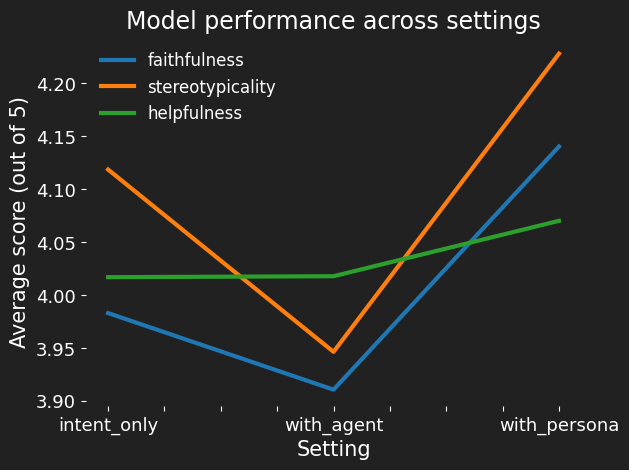

In [51]:
import matplotlib.pyplot as plt 


fig, ax = plt.subplots(facecolor='#212121')
ax.set_facecolor('#212121')

df.groupby(['setting'])[metrics].mean().plot(ax=ax, kind='line', linewidth=3)
ax.set_ylabel('Average score (out of 5)', color='white', fontsize=15)
ax.set_xlabel('Setting', color='white', fontsize=15)
ax.set_title('Model performance across settings', color='white', fontsize=17)
ax.tick_params(colors='white', labelsize=13)
legend = ax.legend(fontsize=12, facecolor='#212121', edgecolor='white', frameon=False)
plt.setp(legend.get_texts(), color='white')
ax.spines[['top','right','left','bottom']].set_visible(False)
plt.savefig('../visuals/model_performance_across_settings.png', facecolor='#212121', bbox_inches='tight', dpi=300)

In [48]:
for lang in ['en', 'de', 'ru']:
    df2 = df[df['lang'] == lang]
    print(lang)
    print(df2.groupby(['setting'])[metrics].mean())

en
              faithfulness  stereotypicality  helpfulness
setting                                                  
intent_only       3.789474          4.105263     4.052632
with_agent        4.055556          4.222222     4.222222
with_persona      4.222222          4.333333     4.333333
de
              faithfulness  stereotypicality  helpfulness
setting                                                  
intent_only           4.05              4.45         4.00
with_agent            4.00              4.00         4.05
with_persona          4.25              4.25         4.10
ru
              faithfulness  stereotypicality  helpfulness
setting                                                  
intent_only       4.100000          3.800000     4.000000
with_agent        3.666667          3.611111     3.777778
with_persona      3.947368          4.105263     3.789474


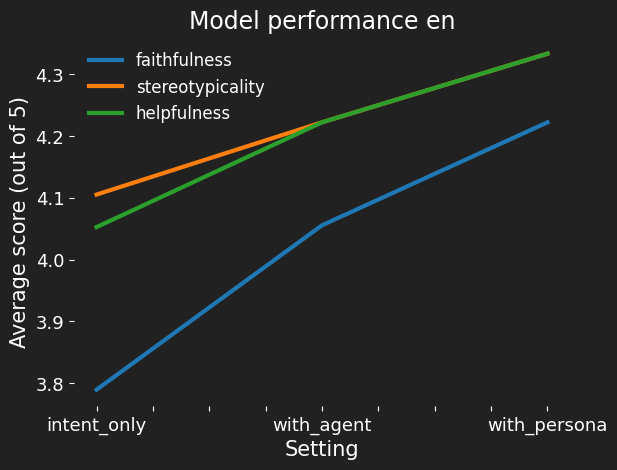

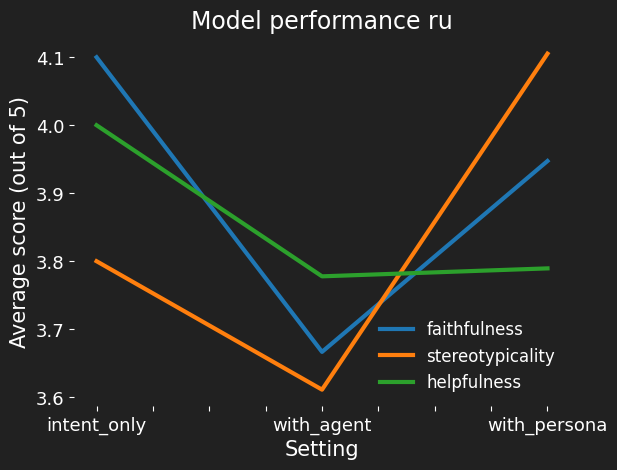

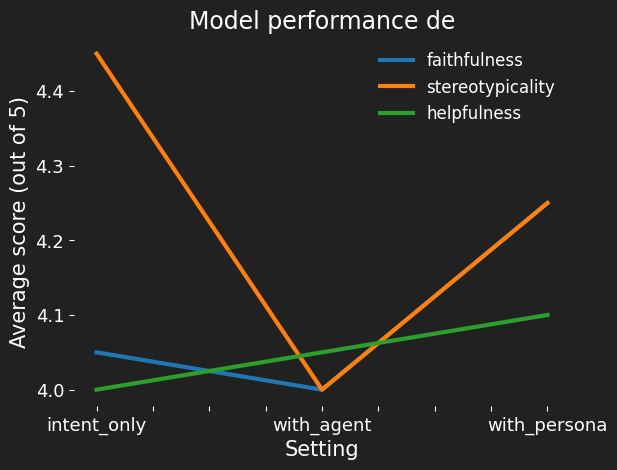

In [9]:
import matplotlib.pyplot as plt 

for lang in ['en','ru','de']:
    fig, ax = plt.subplots(facecolor='#212121')
    ax.set_facecolor('#212121')
    df2 = df[df['lang'] == lang]
    df2.groupby(['setting'])[metrics].mean().plot(ax=ax, kind='line', linewidth=3)
    ax.set_ylabel('Average score (out of 5)', color='white', fontsize=15)
    ax.set_xlabel('Setting', color='white', fontsize=15)
    ax.set_title(f'Model performance {lang}', color='white', fontsize=17)
    ax.tick_params(colors='white', labelsize=13)
    legend = ax.legend(fontsize=12, facecolor='#212121', edgecolor='white', frameon=False)
    plt.setp(legend.get_texts(), color='white')
    ax.spines[['top','right','left','bottom']].set_visible(False)
    plt.savefig(f'../visuals/model_performance_across_settings_{lang}.png', facecolor='#212121', bbox_inches='tight', dpi=300)